In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

Making a rug plot

(0, 1)

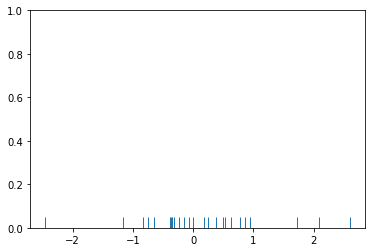

In [4]:
sns.rugplot(dataset)
plt.ylim(0,1)

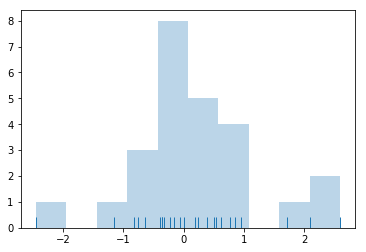

In [6]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

Making a kernel density plot manually

(0.1, 0.42000000000000004)

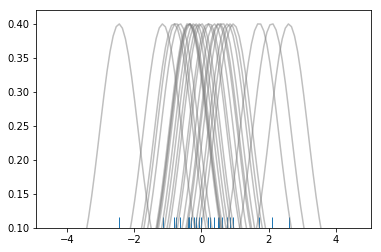

In [8]:
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)
bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) **0.2

kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0.1)

Text(0.5,0.98,'Sum of the basis functions')

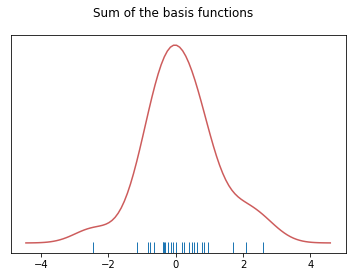

In [9]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

Using the seaborn shortcut to make kernel density plots

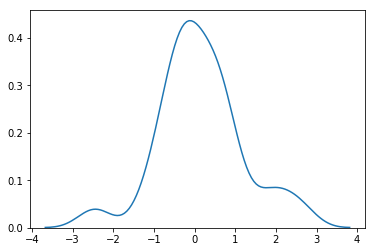

In [10]:
sns.kdeplot(dataset)

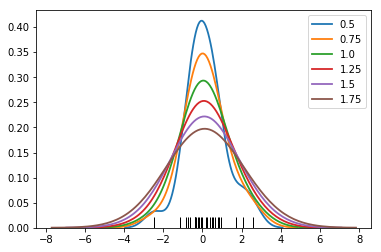

In [12]:
sns.rugplot(dataset,color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

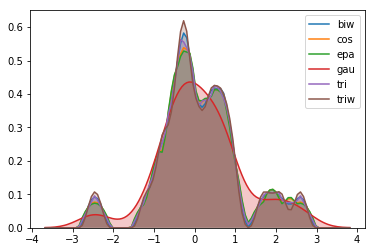

In [14]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

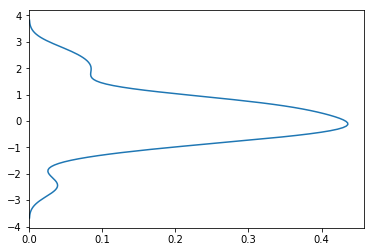

In [16]:
sns.kdeplot(dataset,vertical=True)

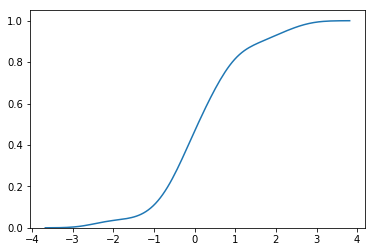

In [17]:
sns.kdeplot(dataset,cumulative=True)

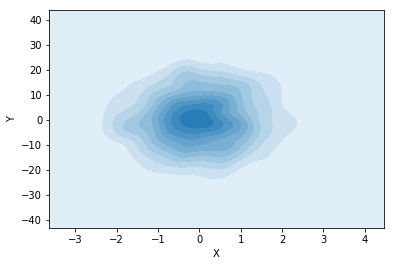

In [20]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe.X,dframe.Y,shade=True)

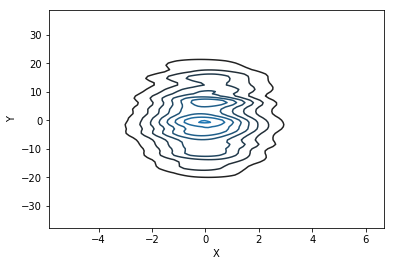

In [28]:
sns.kdeplot(dframe.X,dframe.Y,bw=1)

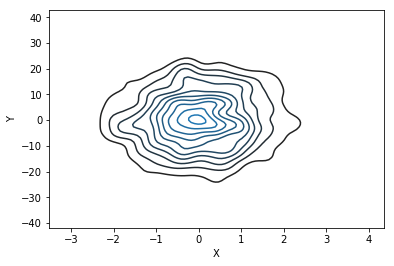

In [29]:
sns.kdeplot(dframe.X,dframe.Y,bw='silverman')

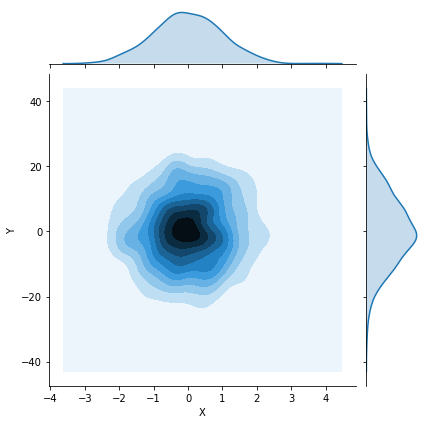

In [27]:
sns.jointplot('X','Y',dframe,kind='kde')